In [1]:
#!pip install pandas
#!pip install sklearn
#!pip install seaborn
#!pip install mathplotlib
#!pip install statsmodels

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sma
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

# Some Math and Regression discussion here

Talk about some of the underlying math and different regression concepts

# The DataSet

This dataset lists the sales of 1460 homes with 79 distinct details regarding the home. The dataset is posted by Kaggle for a competition to predict the price of homes, the data can be found at https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview

In [2]:
df = pd.read_csv('house_prices.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


For our first experiment, we want to make a linear regression model that we can use to find some correlation with the Sale Price of the house and some other feature(s). <br><br>

We see a ton of nulls and similar values in this dataset. There are going to be a ton of homes with either a pool or no pool, gravel or no gravel which we will look at in later so see any correlations in price. Instead of just dropping all the null values or remapping them to zeros, and specifically for this first experiment, we are only going to keep all columns that are both numerical and have no null values. In later experiments we can map our object values to a numerical value and see how much more of an accurate model we can get with either logistical or linear regression.<br><br>


# Pre-Processing

In [3]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

We can see that there a decent amount of non numerical data types that we arent going to feed into our linear regression model. Lets clean up that up as well as any null values. For instance, LotFrontage is just the linear feet of roadway attached to the property, I feel that dropping almost 20% of our dataset for this one feature is not worth keeping the feature. The same goes for the year the garage was built.

In [4]:
X = df.select_dtypes(include=['int64', 'float64'])
X = X.drop(columns = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea', 'SalePrice', 'Id'])
y = df['SalePrice']

In [5]:
X.dtypes.head(), X.shape, df.shape, y.shape

(MSSubClass     int64
 LotArea        int64
 OverallQual    int64
 OverallCond    int64
 YearBuilt      int64
 dtype: object,
 (1460, 33),
 (1460, 81),
 (1460,))

Looks like we have all the columns with ojects dropped, the shape still looks good with 33 columns with useable values. Next lets standardize our data by scaling it into a z-score (talk about some of the math of the z-score and its usefulness here why are we using it for this model?) In a future experiment we may use a different scaling method.

In [6]:
scaled = StandardScaler().fit_transform(X)
X_scaled = pd.DataFrame(scaled,columns = X.columns)
X_scaled.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.073375,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.575425,-0.288653,-0.944591,-0.459303,...,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777
1,-0.872563,-0.091886,-0.071836,2.179628,0.156734,-0.429577,1.171992,-0.288653,-0.641228,0.466465,...,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439
2,0.073375,0.073480,0.651479,-0.517200,0.984752,0.830215,0.092907,-0.288653,-0.301643,-0.313369,...,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777
3,0.309859,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.499274,-0.288653,-0.061670,-0.687324,...,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655
4,0.073375,0.375148,1.374795,-0.517200,0.951632,0.733308,0.463568,-0.288653,-0.174865,0.199680,...,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777


# Exploration

Next we are going to get a list of or best features be selecting the k-nearest neighbors ####(explain this and maybe some math associated)###

In [7]:

fs = SelectKBest(score_func=f_regression, k=7)
best = fs.fit_transform(X_scaled,y)
features = np.array(list(X_scaled.columns))
best_features = features[fs.get_support()]
print(best_features)

['OverallQual' 'TotalBsmtSF' '1stFlrSF' 'GrLivArea' 'FullBath'
 'GarageCars' 'GarageArea']


<AxesSubplot: xlabel='GrLivArea', ylabel='SalePrice'>

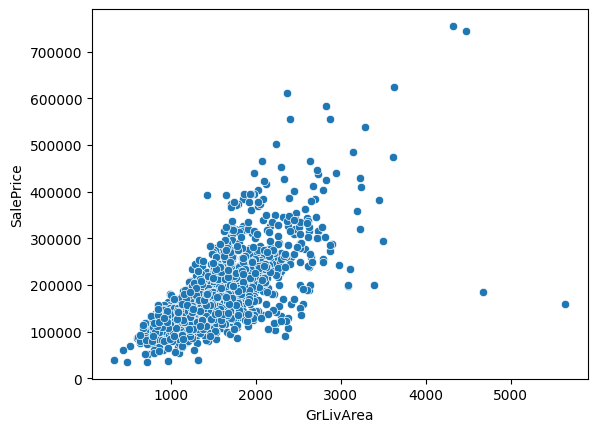

In [8]:
sns.scatterplot(data=df, x='GrLivArea', y='SalePrice')

Just using a scatterplot, we can see that there are 4 or 5 outliers in the data, lets get rid of those. There may be some anomaly in these home sales that is causing the outliers, maybe ghosts?

In [9]:
IQR = df.quantile(0.95) - df.quantile(0.05)
df = df[~((df < (df.quantile(0.05) - 1.5 * IQR)) | (df > (df.quantile(0.95) + 1.5 * IQR))).any(axis=1)]

Here we are going to trim those outliers by trimming off the top and bottom 5% of the dataset.

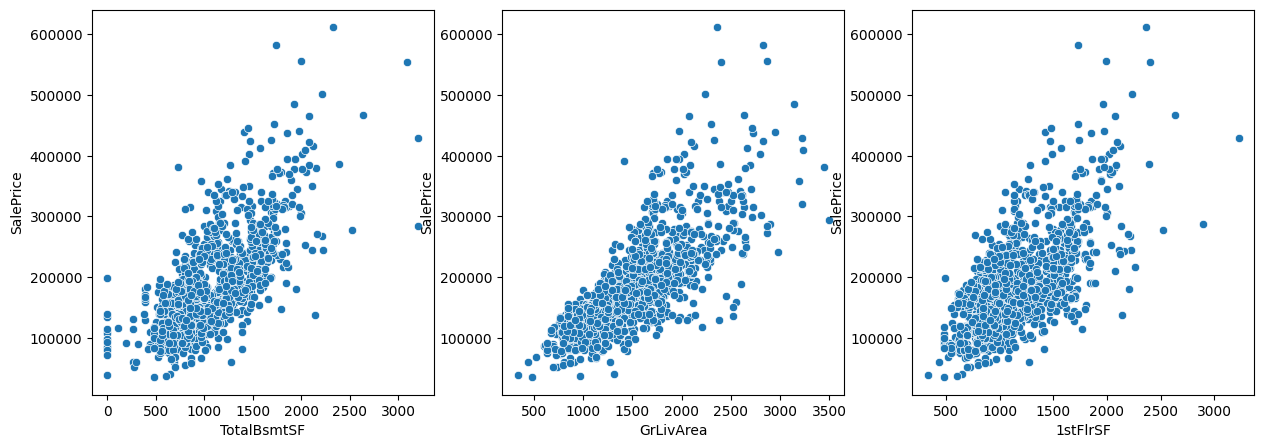

In [10]:
fig, ax = plt.subplots(1,3)
sns.scatterplot(data=df, x='1stFlrSF', y='SalePrice', ax=ax[2])
sns.scatterplot(data=df, x='GrLivArea', y='SalePrice', ax=ax[1])
sns.scatterplot(data=df, x='TotalBsmtSF', y='SalePrice', ax=ax[0])
fig.set_size_inches(15,5)

Using a few of the recommended features, they all seem to follow a very similar trend. Maybe because they are all related to square footage? Almost definitely. <br><br>

GrLivArea is the square footage of livable space on or above ground level. I like how the maximum sale price in relation to the square footage is so tightly related, so for this experiment we will continue to use this feature for some more exploration. Why is this happening? I would expect some outliers for say a home with a large lot, historical value, or some high valued area to produce some sort of outliers. Maybe the dataset is specific to a certain area or is just small enough to not include home sales like that.

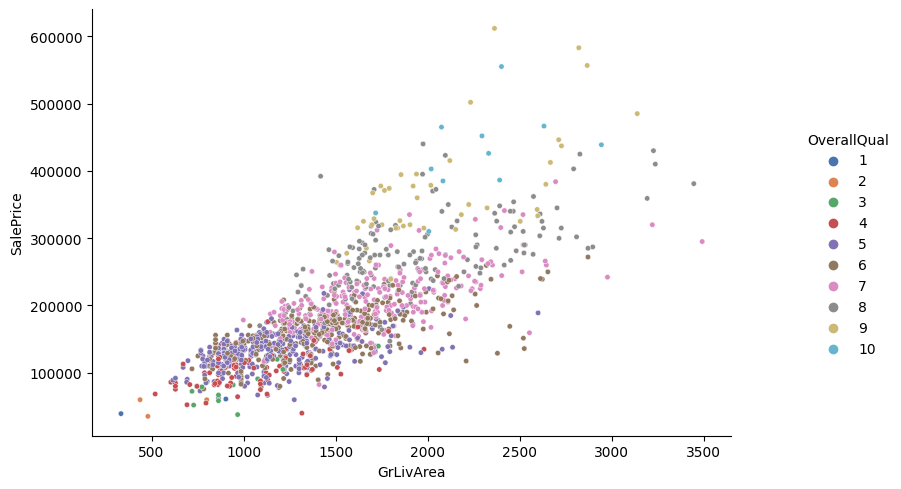

In [12]:
dfplt=sns.relplot(
    data= df, x="GrLivArea", y="SalePrice", hue="OverallQual", palette= "deep",
    s = 15, kind="scatter"
)
dfplt.fig.set_size_inches(10,5)

After adding in OverallQual, which is the quality of building materials used and finish quality, we can definitely see a stratification of colors forming in our scatterplot. I think this could be very valuable in narrowing down our predicted home values. <br> <br>

Lets look at another feature like 'Fence'. This just tells us what quality or if there is a fence attached to the home. We can ignore the quality rating and just get a binary value of if the home has a fence or not.

In [13]:
df["Fence"] = df["Fence"].notnull().astype("int")

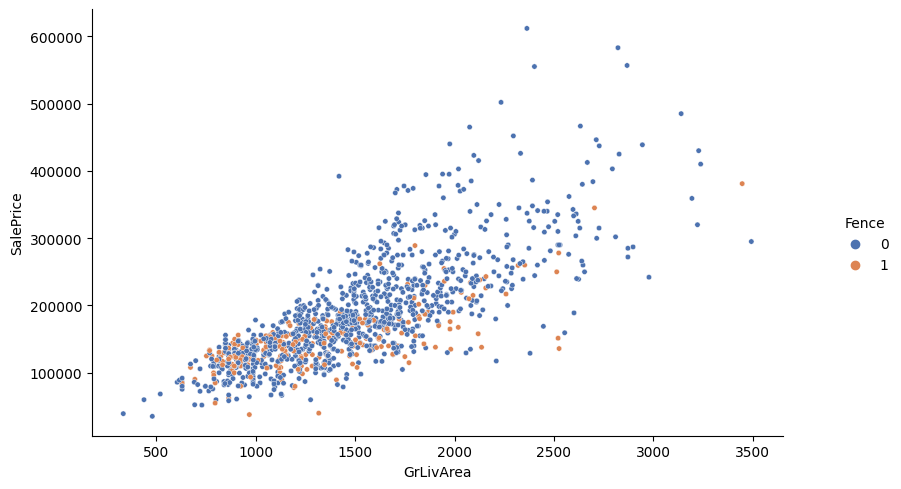

In [14]:
dfplt=sns.relplot(
    data= df, x="GrLivArea", y="SalePrice", hue = "Fence",
    palette= "deep", s = 15, kind="scatter")
dfplt.fig.set_size_inches(10,5)

More stratification of features! There is definitely a trend forming here where homes *with* fences are selling at a lower value specifically from around 1500 square feet and up. Let's seperate and compare the homes with and without fences and also add in out Quality metric as well.

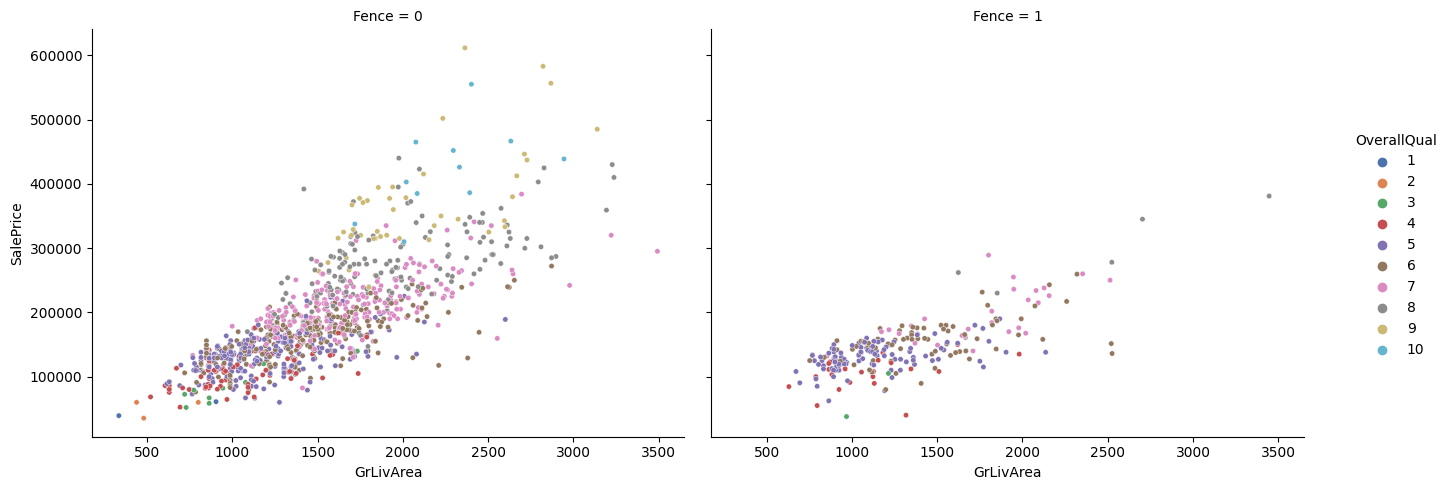

In [15]:
dfplt=sns.relplot(
    data= df, x="GrLivArea", y="SalePrice", col ="Fence", 
    hue="OverallQual", palette= "deep", s = 15, kind="scatter")
dfplt.fig.set_size_inches(15,5)

Very interesting! It looks like our change in home value in homes *without* fences have a very steady linear increase comapred to homes *with* are following a much less steep slope. Again, why is this dataset telling us this? Is removing a fence before you sell the best idea? Can you flip houses solely based on buying homes with fences and jsut removing them before resale?

# Modeling

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled[best_features], y, test_size = 0.25, random_state = 4 )

In [17]:
lr = linear_model.LinearRegression()
lr_model = lr.fit(X_train, y_train)

In [18]:
X2 = sma.add_constant(X_train)
est = sma.OLS(y_train, X2)
est2 = est.fit()

print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     479.9
Date:                Thu, 20 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:42:15   Log-Likelihood:                -13163.
No. Observations:                1095   AIC:                         2.634e+04
Df Residuals:                    1087   BIC:                         2.638e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.817e+05   1220.750    148.860      

We can see t

In [19]:
print('Model Intercept:', lr_model.intercept_)
print('Coefficient of Determination:', lr_model.score(X_test, y_test))

coeff_df = pd.DataFrame(lr_model.coef_, X_test.columns, columns=['Coefficients'])
coeff_df

Model Intercept: 181721.08266874417
Coefficient of Determination: 0.7822235304128073


,Coefficients
OverallQual,32223.608734
TotalBsmtSF,10673.088355
1stFlrSF,4594.605781
GrLivArea,21105.101968
FullBath,2181.405996
GarageCars,12824.722081
GarageArea,2104.872646


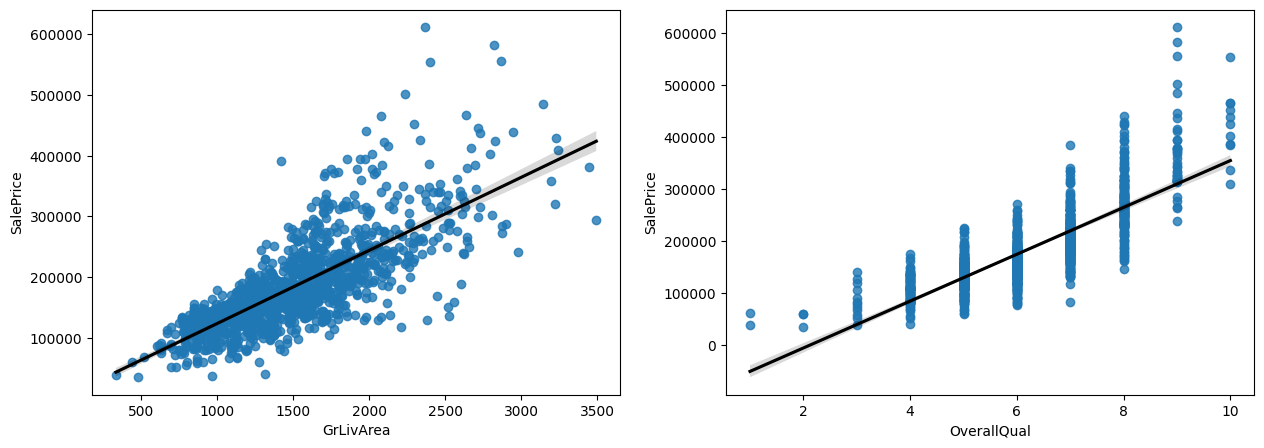

In [20]:
fig, ax = plt.subplots(1,2)
plot_rnet = sns.regplot(data = df,x="OverallQual", y="SalePrice",line_kws={'color':'black',
                        'label':'$y=%5.4sx+%5.5s$'%(lr_model.coef_[1],lr_model.intercept_)}, ax=ax[1])
plot_rnet = sns.regplot(data = df,x="GrLivArea", y="SalePrice",line_kws={'color':'black',
                        'label':'$y=%5.4sx+%5.5s$'%(lr_model.coef_[0],lr_model.intercept_)}, ax=ax[0])
fig.set_size_inches(15,5)

In [21]:
y_pred = lr_model.predict(X_test)

In [22]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test, y_pred,squared = False)

print('Mean Absolute Error:', mae)
print('Root Mean Square Error:', rmse)

Mean Absolute Error: 25054.0719980784
Root Mean Square Error: 34184.00446414236
